In [20]:
from spike_train.synthetic_spike_train import SpikeTrainGenerator
from entropy.entropy import EntropyCalculator

In [21]:
generator = SpikeTrainGenerator(None)
entropy_calculator = EntropyCalculator()

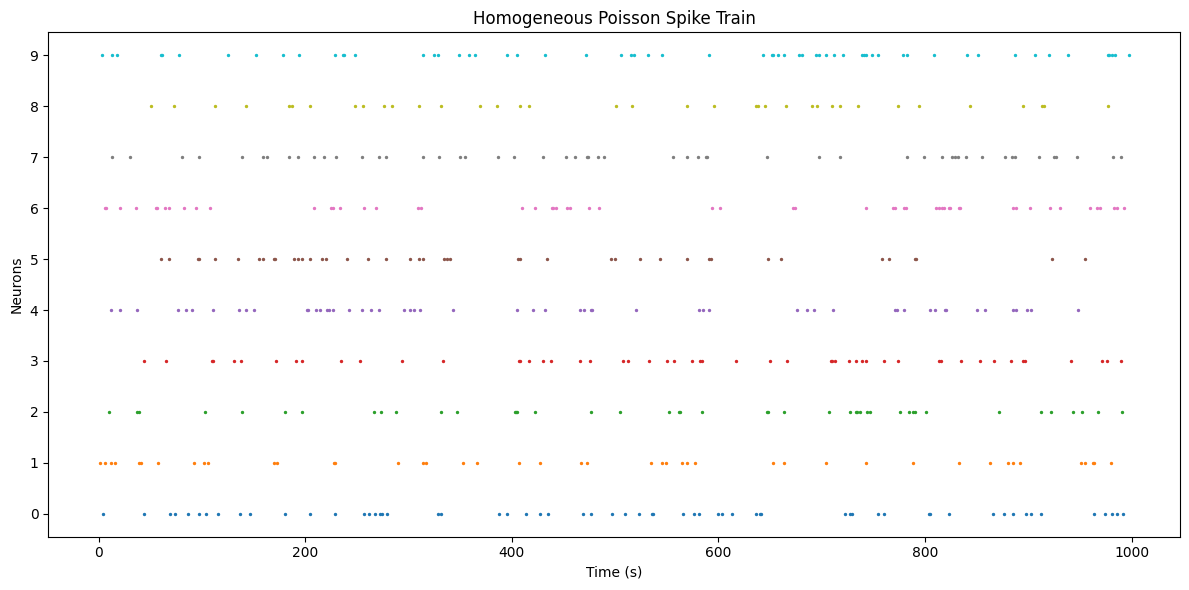

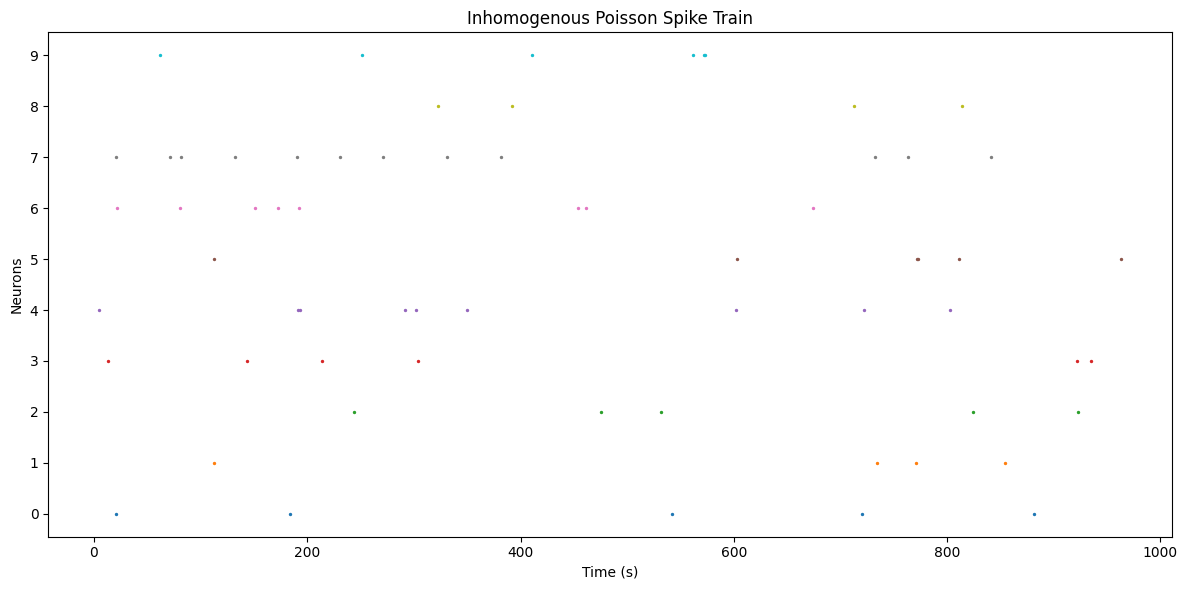

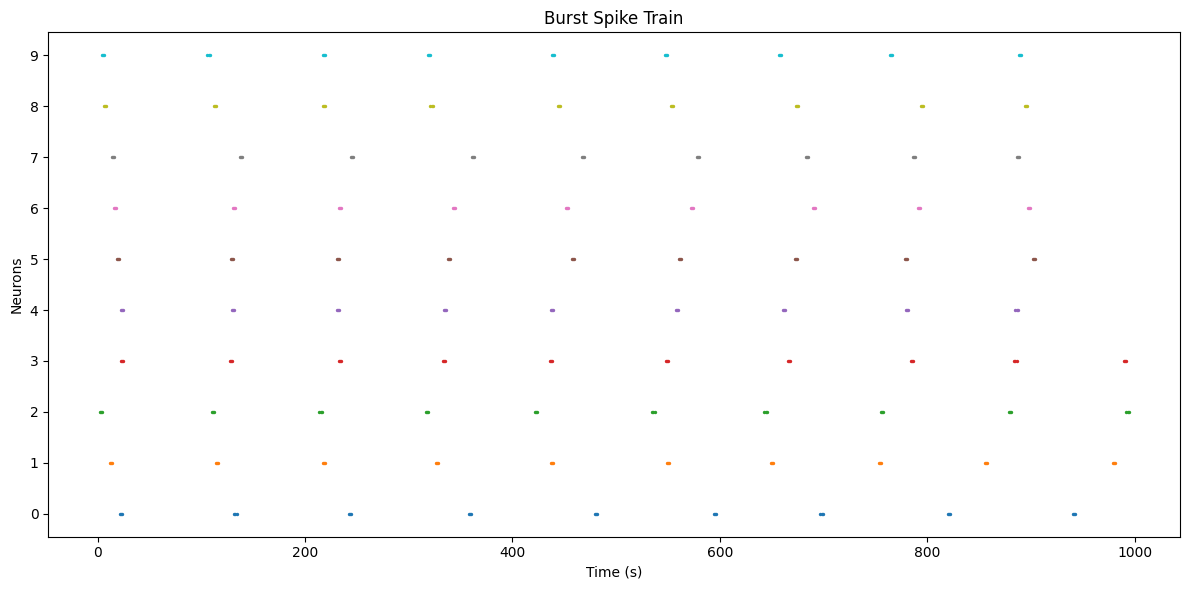

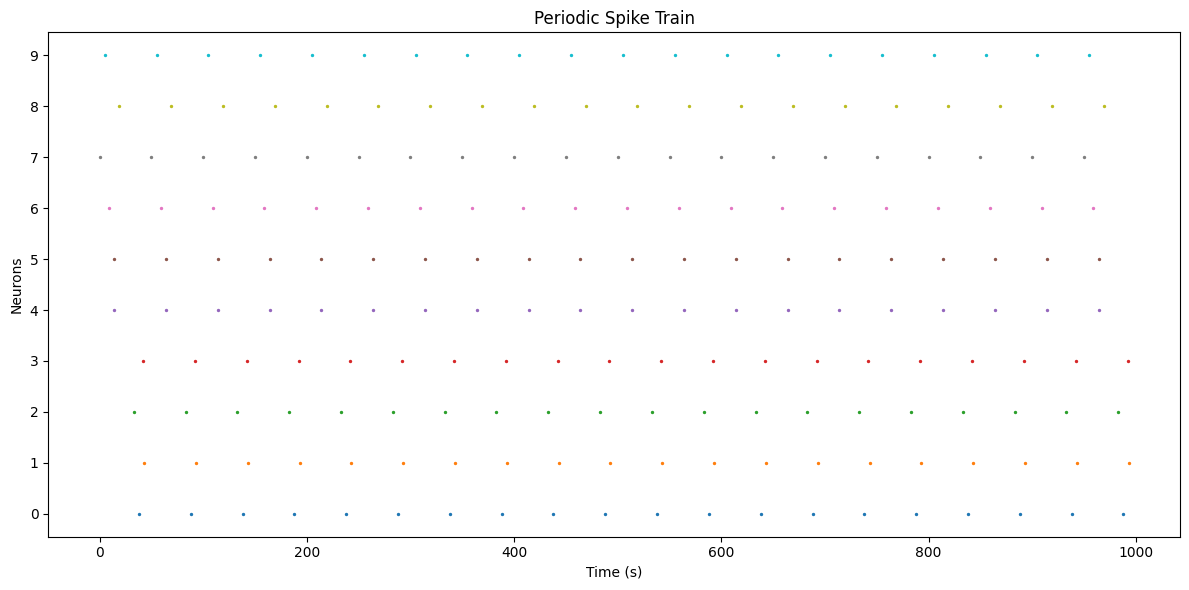

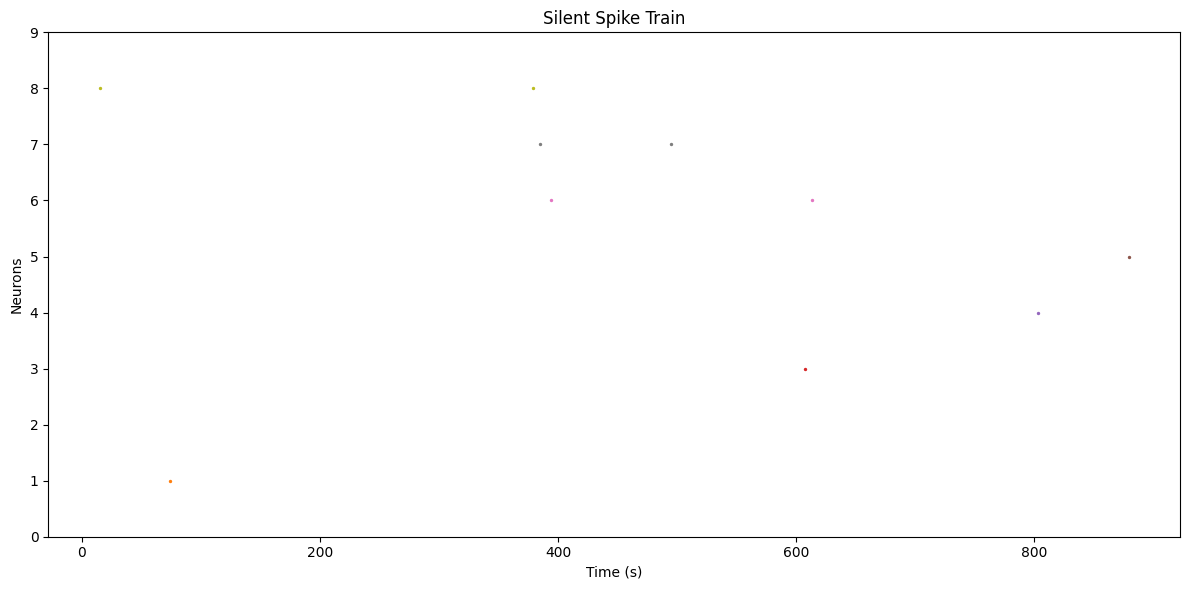

In [36]:
# generate a homogeneous Poisson spike train
homo_poisson_spike_train = generator.generate_homogeneous_poisson_spikes(
    n_neurons=10,
    rate=50,  # spikes per second
    duration=1,  # seconds
)

# generate a inhomogeneous Poisson spike train
inhomo_poisson_spike_train = generator.generate_inhomogeneous_poisson_spikes(
    n_neurons=10,
    rate_fn=generator.sinusoidal_rate_fn,
    duration=1,  # seconds
)

# generate a burst spike train
burst_spike_train = generator.generate_burst_spike(
    n_neurons=10,
    duration=1,  # seconds
)

# generate a periodic spike train
periodic_spike_train = generator.generate_periodic_spikes(
    n_neurons=10,
    intervals=None,  # default intervals
    duration=1,  # seconds
)

# generate a silent spike train
silent_spike_train = generator.generate_silent_spikes(
    n_neurons=10,
    duration=1,  # seconds
    silent_rate=0.001,
)

generator.plot_spike_train(
    spike_train=homo_poisson_spike_train,
    title="Homogeneous Poisson Spike Train",
)

generator.plot_spike_train(
    spike_train=inhomo_poisson_spike_train,
    title="Inhomogenous Poisson Spike Train"
)

generator.plot_spike_train(
    spike_train=burst_spike_train,
    title="Burst Spike Train"
)

generator.plot_spike_train(
    spike_train=periodic_spike_train,
    title="Periodic Spike Train"
)

generator.plot_spike_train(
    spike_train=silent_spike_train,
    title="Silent Spike Train"
)

In [37]:
# entropy of homogeneous poisson spike train
shannon_homo_poisson = entropy_calculator.shannon_entropy(
    homo_poisson_spike_train,
    'mean'
)

enrate_homo_poisson = entropy_calculator.entropy_rate_matrix(
    spike_train=homo_poisson_spike_train,
    output='mean'
)

print(f"Shannon Entropy of Homogeneous Poisson Spike Train: {shannon_homo_poisson}")
print(f"Entropy Rate of Homogeneous Poisson Spike Train: {enrate_homo_poisson}")

Shannon Entropy of Homogeneous Poisson Spike Train: 0.28801959621348694
Entropy Rate of Homogeneous Poisson Spike Train: 0.28757225831555855


In [38]:
# entropy of inhomogeneous poisson spike train
shannon_inhomo_poisson = entropy_calculator.shannon_entropy(
    spike_train=inhomo_poisson_spike_train,
    output='mean'
)

enrate_inhomo_poisson = entropy_calculator.entropy_rate_matrix(
    spike_train=inhomo_poisson_spike_train,
    output='mean'
)

print(f"Shannon Entropy of Inhomogeneous Poisson Spike Train: {shannon_inhomo_poisson}")
print(f"Entropy Rate of Inhomogeneous Poisson Spike Train: {enrate_inhomo_poisson}")

Shannon Entropy of Inhomogeneous Poisson Spike Train: 0.05599071846400631
Entropy Rate of Inhomogeneous Poisson Spike Train: 0.05543901792820203


In [39]:
# entropy of burst spike train
shannon_burst_spike = entropy_calculator.shannon_entropy(
    spike_train=burst_spike_train,
    output='mean'
)

enrate_burst_spike = entropy_calculator.entropy_rate_matrix(
    spike_train=burst_spike_train,
    output='mean'
)

print(f"Shannon Entropy of Burst Spike Train: {shannon_burst_spike}")
print(f"Entropy Rate of Burst Spike Train: {enrate_burst_spike}")


Shannon Entropy of Burst Spike Train: 0.18369898077662916
Entropy Rate of Burst Spike Train: 0.12661547352132788


In [40]:
# entropy of periodic spike train
shannon_periodic_spike = entropy_calculator.shannon_entropy(
    spike_train=periodic_spike_train,
    output='mean'
)

enrate_periodic_spike = entropy_calculator.entropy_rate_matrix(
    spike_train=periodic_spike_train,
    output='mean'
)

print(f"Shannon Entropy of Periodic Spike Train: {shannon_periodic_spike}")
print(f"Entropy Rate of Periodic Spike Train: {enrate_periodic_spike}")

Shannon Entropy of Periodic Spike Train: 0.14144054254182065
Entropy Rate of Periodic Spike Train: 0.1406967276884493


In [41]:
# entropy of silent spike train
shannon_silent_spike = entropy_calculator.shannon_entropy(
    spike_train=silent_spike_train,
    output='mean'
)

enrate_silent_spike = entropy_calculator.entropy_rate_matrix(
    spike_train=silent_spike_train,
    output='mean'
)

print(f"Shannon Entropy of Silent Spike Train: {shannon_silent_spike}")
print(f"Entropy Rate of Silent Spike Train: {enrate_silent_spike}")

Shannon Entropy of Silent Spike Train: 0.010807324495634766
Entropy Rate of Silent Spike Train: 0.010823763064774103


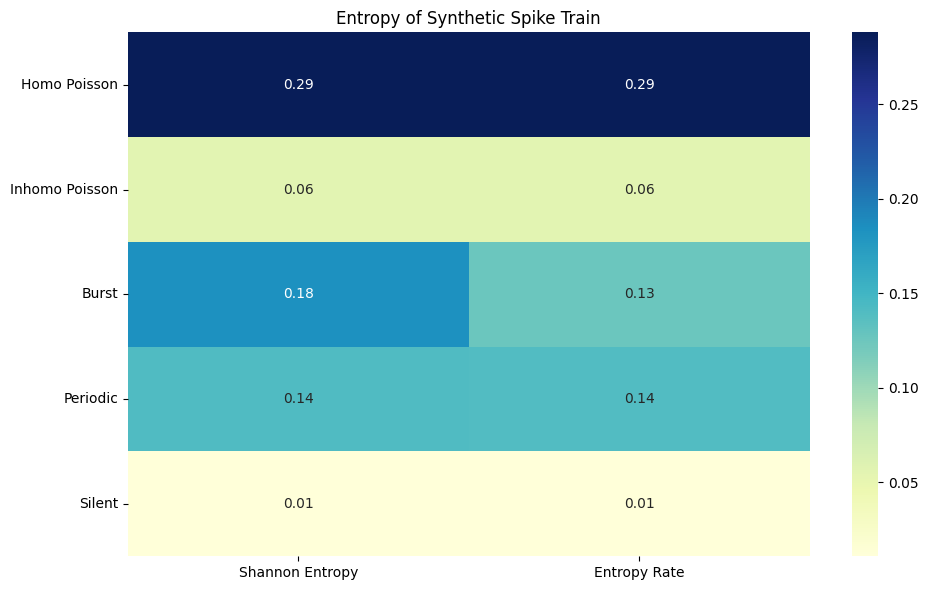

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = {
    "Shannon Entropy": [shannon_homo_poisson, shannon_inhomo_poisson, shannon_burst_spike, shannon_periodic_spike, shannon_silent_spike],
    "Entropy Rate": [enrate_homo_poisson, enrate_inhomo_poisson, enrate_burst_spike, enrate_periodic_spike, enrate_silent_spike]
}

index = ["Homo Poisson", "Inhomo Poisson", "Burst", "Periodic", "Silent"]

df = pd.DataFrame(data, index=index)

plt.figure(figsize=(10,6))
sns.heatmap(df, annot=True, cmap='YlGnBu', fmt='.2f', cbar=True)
plt.title("Entropy of Synthetic Spike Train")
plt.tight_layout()
plt.show()